<a href="https://colab.research.google.com/github/efandresena/AIMS-Course/blob/main/mirindraf_mlas_practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical 2 : Model with biases only

In [ ]:
import random

class Dataset:
    def __init__(self):
        self.userId_to_idx = {}
        self.idx_to_userId = []
        self._data_by_user = []

        self.movieId_to_idx = {}
        self.idx_to_movieId = []
        self._data_by_movie = []

    @property
    def usr_size(self):
        return len(self.idx_to_userId)

    @property
    def movie_size(self):
        return len(self.idx_to_movieId)

    def is_old_user(self, userId):
        return userId in self.userId_to_idx

    def is_old_movie(self, movieId):
        return movieId in self.movieId_to_idx

    def fetch(self, userId, movieId, rating_value, train=True):
        # Ensure user exists
        if not self.is_old_user(userId):
            user_pos = len(self.idx_to_userId)
            self.userId_to_idx[userId] = user_pos
            self.idx_to_userId.append(userId)
            self._data_by_user.append([])
        else:
            user_pos = self.userId_to_idx[userId]

        # Ensure movie exists
        if not self.is_old_movie(movieId):
            movie_pos = len(self.idx_to_movieId)
            self.movieId_to_idx[movieId] = movie_pos
            self.idx_to_movieId.append(movieId)
            self._data_by_movie.append([])
        else:
            movie_pos = self.movieId_to_idx[movieId]

        # Only add rating if this is train/test actual dataset
        if train is not None:
            self._data_by_user[user_pos].append((movie_pos, rating_value))
            self._data_by_movie[movie_pos].append((user_pos, rating_value))

    def __repr__(self):
        return (f"Dataset(users={self.usr_size}, movies={self.movie_size}, "
                f"ratings={sum(len(r) for r in self._data_by_user)})")


# --- Example streaming split ---
train = Dataset()
test = Dataset()
test_ratio = 0.2

with open("link.csv", 'r') as file:
    next(file)  # skip header
    for line in file:
        userId, movieId, rating = line.strip().split(',')
        rating = float(rating)

        if random.random() < test_ratio:
            # Assign to test
            test.fetch(userId, movieId, rating, train=True)
            train.fetch(userId, movieId, rating, train=None)  # only ensures alignment
        else:
            # Assign to train
            train.fetch(userId, movieId, rating, train=True)
            test.fetch(userId, movieId, rating, train=None)  # only ensures alignment


# --- Print first 20 ratings per user/movie ---
def inspect_dataset(ds, name):
    print(f"\n{name}: {ds}")
    print("First 20 ratings per user:")
    for u_idx, ratings in enumerate(ds._data_by_user[:20]):
        print(f" User {ds.idx_to_userId[u_idx]}: {ratings[:20]}")
    print("\nFirst 20 ratings per movie:")
    for m_idx, ratings in enumerate(ds._data_by_movie[:20]):
        print(f" Movie {ds.idx_to_movieId[m_idx]}: {ratings[:20]}")


inspect_dataset(train, "Train set")
inspect_dataset(test, "Test set")


In [ ]:

!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

# Read the file
link = "/content/ml-latest-small/ratings.csv"
data = Dataset()
with open(link, 'r') as file:
  next(file)
  for line in file:
    user_movie_i = line.split(',')
    data.fetch(user_movie_i[0], user_movie_i[1], user_movie_i[2])


--2025-11-10 12:44:44--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K  --.-KB/s    in 0.1s    

2025-11-10 12:44:45 (6.77 MB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]

Archive:  ml-latest-small.zip
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


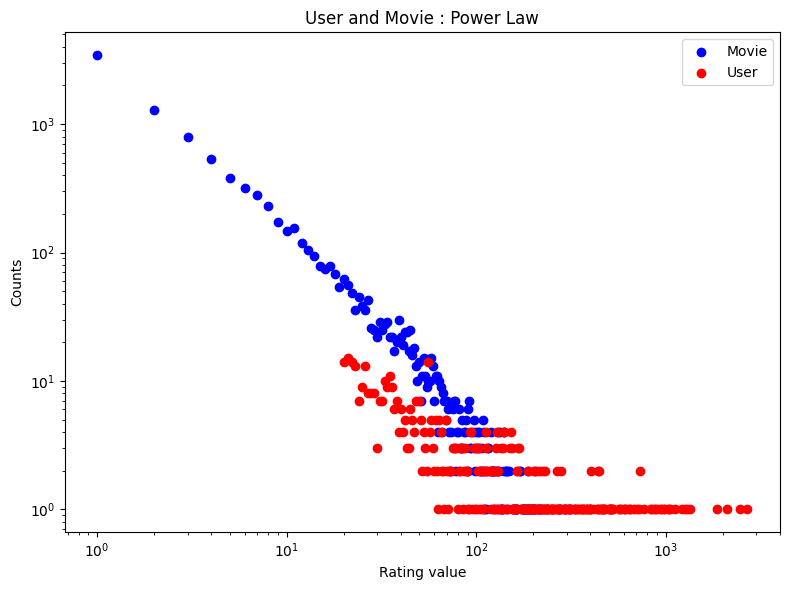

In [ ]:
# Get degree
user_degree = []
movie_degree = []
for user in data.get_user_data():
  user_degree.append(len(user))
for movie in data.get_movie_data():
  movie_degree.append(len(movie))

unique_m, counts_m = np.unique(movie_degree, return_counts=True)
unique_u, counts_u = np.unique(user_degree, return_counts=True)
len(movie_degree)



fig, ax = plt.subplots( figsize=(8, 6))

# Movie degree scatter
ax.scatter(unique_m, counts_m,label='Movie', c='b')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('User and Movie : Power Law')
ax.set_xlabel('Rating value')
ax.set_ylabel('Counts')

# User degree scatter
ax.scatter(unique_u, counts_u,label='User', c='r')
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()


plt.tight_layout()
plt.savefig("power_law.pdf")
plt.show()


In [ ]:
dataset

DoubleIndex(user=[[(0, '4.0'), (1, '4.0'), (2, '4.0'), (3, '5.0'), (4, '5.0'), (5, '3.0'), (6, '5.0'), (7, '4.0'), (8, '5.0'), (9, '5.0'), (10, '5.0'), (11, '5.0'), (12, '3.0'), (13, '5.0'), (14, '4.0'), (15, '5.0'), (16, '3.0'), (17, '3.0'), (18, '5.0'), (19, '4.0'), (20, '4.0'), (21, '5.0'), (22, '4.0'), (23, '3.0'), (24, '4.0'), (25, '5.0'), (26, '4.0'), (27, '3.0'), (28, '5.0'), (29, '4.0'), (30, '4.0'), (31, '5.0'), (32, '4.0'), (33, '4.0'), (34, '4.0'), (35, '5.0'), (36, '5.0'), (37, '3.0'), (38, '5.0'), (39, '3.0'), (40, '4.0'), (41, '3.0'), (42, '3.0'), (43, '4.0'), (44, '5.0'), (45, '5.0'), (46, '5.0'), (47, '4.0'), (48, '5.0'), (49, '3.0'), (50, '5.0'), (51, '5.0'), (52, '5.0'), (53, '5.0'), (54, '3.0'), (55, '5.0'), (56, '5.0'), (57, '4.0'), (58, '5.0'), (59, '4.0'), (60, '5.0'), (61, '5.0'), (62, '5.0'), (63, '4.0'), (64, '5.0'), (65, '5.0'), (66, '4.0'), (67, '5.0'), (68, '5.0'), (69, '5.0'), (70, '5.0'), (71, '5.0'), (72, '4.0'), (73, '5.0'), (74, '5.0'), (75, '4.0'), (76